# 1. Import the dataset
# 2. Data cleaning
# 3. EDA
# 4. Text Preprocessing
# 5. Model building
# 6. Website
# 7. Deploy

# 1.IMPORT THE DATASET

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('/Users/nitin/Downloads/Resume dataset.csv')

In [63]:
df.head()

,Category,Resume
0,Frontend Developer,"As a seasoned Frontend Developer, I have a pro..."
1,Backend Developer,With a solid background in Backend Development...
2,Python Developer,"As a Python Developer, I leverage my expertise..."
3,Data Scientist,"With a background in Data Science, I possess a..."
4,Frontend Developer,Experienced Frontend Developer with a passion ...


In [64]:
df.shape

(400, 2)

# 2. Data cleaning

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  400 non-null    object
 1   Resume    400 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


In [66]:
# missing values
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [67]:
# check for duplicate values
df.duplicated().sum()

212

In [68]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [69]:
df.duplicated().sum()

0

In [70]:
df.shape

(188, 2)

# 3. EDA

In [71]:
df['Category'].value_counts()

Full Stack Developer                  30
Data Scientist                        29
Frontend Developer                    24
Mobile App Developer (iOS/Android)    23
Cloud Engineer                        23
Python Developer                      22
Backend Developer                     19
Machine Learning Engineer             18
Name: Category, dtype: int64

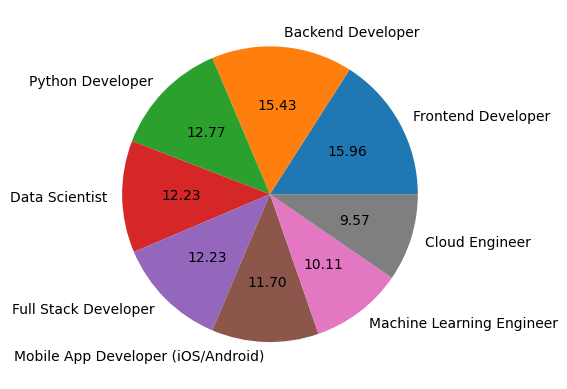

In [72]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['Frontend Developer', 'Backend Developer', 'Python Developer',
       'Data Scientist', 'Full Stack Developer',
       'Mobile App Developer (iOS/Android)', 'Machine Learning Engineer',
       'Cloud Engineer'],autopct="%0.2f")
plt.show()

In [73]:
df['Category'].unique()

array(['Frontend Developer', 'Backend Developer', 'Python Developer',
       'Data Scientist', 'Full Stack Developer',
       'Mobile App Developer (iOS/Android)', 'Machine Learning Engineer',
       'Cloud Engineer'], dtype=object)

In [74]:
df['Category'][0]

'Frontend Developer'

In [75]:
df['Resume'][0]

'As a seasoned Frontend Developer, I have a proven track record of crafting stunning and responsive user interfaces for web applications. With over 5 years of experience, I am proficient in HTML, CSS, and JavaScript, and I have a deep understanding of modern frontend frameworks such as React, Vue.js, and Angular. I excel in translating design mockups into pixel-perfect, cross-browser compatible UIs, ensuring an optimal user experience across devices. Additionally, I am well-versed in CSS preprocessors like Sass and LESS, enabling me to write clean and maintainable stylesheets. My passion for UI/UX design drives me to stay updated with the latest trends and best practices in the industry, allowing me to create visually appealing and intuitive interfaces that engage users. I am a collaborative team player with excellent communication skills, able to work closely with designers, backend developers, and stakeholders to deliver high-quality frontend solutions on time and within budget.'

# 4. Cleaning Data:                                      
1 URLs,                                                
2 hashtags,                                             
3 mentions,                                                     
4 special letters,                                             
5 punctuations:                                             

In [76]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [77]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [78]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [79]:
df['Resume'][0]

'As a seasoned Frontend Developer I have a proven track record of crafting stunning and responsive user interfaces for web applications With over 5 years of experience I am proficient in HTML CSS and JavaScript and I have a deep understanding of modern frontend frameworks such as React Vue js and Angular I excel in translating design mockups into pixel perfect cross browser compatible UIs ensuring an optimal user experience across devices Additionally I am well versed in CSS preprocessors like Sass and LESS enabling me to write clean and maintainable stylesheets My passion for UI UX design drives me to stay updated with the latest trends and best practices in the industry allowing me to create visually appealing and intuitive interfaces that engage users I am a collaborative team player with excellent communication skills able to work closely with designers backend developers and stakeholders to deliver high quality frontend solutions on time and within budget '

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [81]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [82]:
df.Category.unique()

array([3, 0, 7, 2, 4, 6, 5, 1])

('Frontend Developer', 'Backend Developer', 'Python Developer',
 'Data Scientist', 'Full Stack Developer',
  'Mobile App Developer (iOS/Android)', 'Machine Learning Engineer',
    'Cloud Engineer')

# 5. Model building

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)

In [86]:
X_train.shape

(150, 1118)

In [87]:
X_test.shape

(38, 1118)

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print("Precision Score : ",precision_score(y_test, ypred, 
                                           pos_label='positive',
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, ypred, 
                                           pos_label='positive',
                                           average='macro'))

1.0
[[6 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 0 7 0 0 0 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 0 3 0 0 0]
 [0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 9]]
Precision Score :  1.0
Recall Score :  1.0


C:\Users\nitin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\nitin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [89]:
ypred

array([1, 7, 0, 2, 0, 0, 5, 7, 2, 6, 3, 0, 5, 7, 3, 0, 1, 7, 6, 2, 4, 2,
       4, 7, 1, 1, 3, 2, 7, 5, 2, 7, 7, 2, 7, 5, 0, 4])

In [90]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))
